<a href="https://colab.research.google.com/github/iamharkirat/business_intelligence/blob/main/Copy_of_Intermediary_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Directory, Libraries and data

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#Libraries
import pandas as pd
import scipy.stats as st
import math as m
import seaborn as sns
import statsmodels.stats.api as sm

In [18]:
#Load Data
df = pd.read_csv("/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics/Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Normal distribution

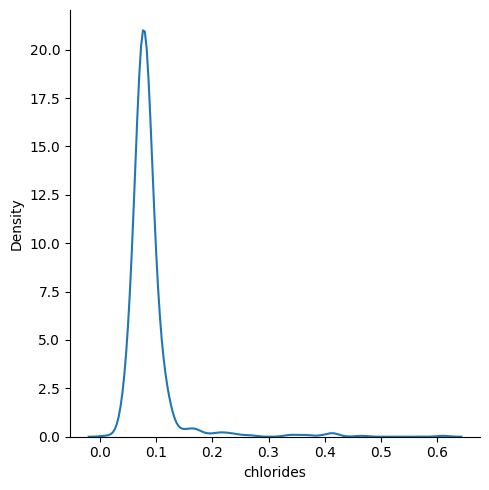

In [19]:
sns.displot(df['chlorides'],  kind='kde');

In [20]:
df.loc[(df.chlorides <= df.chlorides.mean() + 2 * df.chlorides.std()) &
       (df.chlorides >= df.chlorides.mean() - 2 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9718574108818011

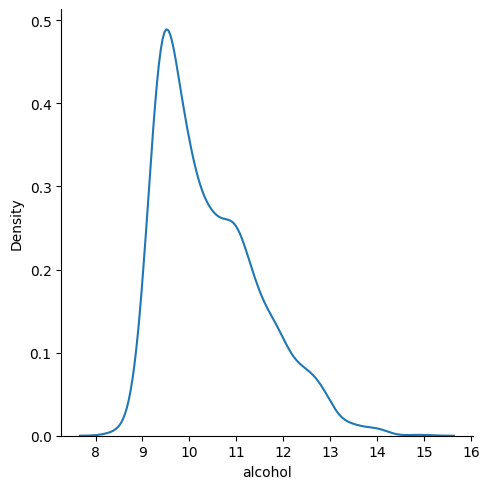

In [21]:
sns.displot(df['alcohol'],  kind='kde');

In [22]:
df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

#Shapiro-Wilks Test

In [23]:
state, p = st.shapiro(df.chlorides)
print(p)

if p > 0.05:
  print('Sample looks Gaussian/Normal (fail to reject H0)')
else:
  print('Sample does looks Gaussian/Normal (fail to reject H0)')

0.0
Sample does looks Gaussian/Normal (fail to reject H0)


In [24]:
state, p = st.shapiro(df.sulphates)
print(p)

if p > 0.05:
  print('Sample looks Gaussian/Normal (fail to reject H0)')
else:
  print('Sample does looks Gaussian/Normal (fail to reject H0)')

5.821617678881608e-38
Sample does looks Gaussian/Normal (fail to reject H0)


#Standard Error

In [25]:
#Using a function
st.sem(df.alcohol)

0.026650018979018173

In [26]:
#Us doing the computations: Standard deviations divided by square root of observations
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018173

In [27]:
#Standard Error of pH
print(st.sem(df.pH))
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203784


0.0038608683325203784

#Confidence Interval

In [28]:
# Confidence interval of the mean of citric acid
mean_citric_acid = df[['citric acid']].mean()

confidence_interval = st.norm.interval(0.95,
                                       loc=mean_citric_acid,
                                       scale=st.sem(df[['citric acid']]))

print(mean_citric_acid)
print(confidence_interval)

citric acid    0.270976
dtype: float64
(array([0.26142755]), array([0.28052367]))


array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

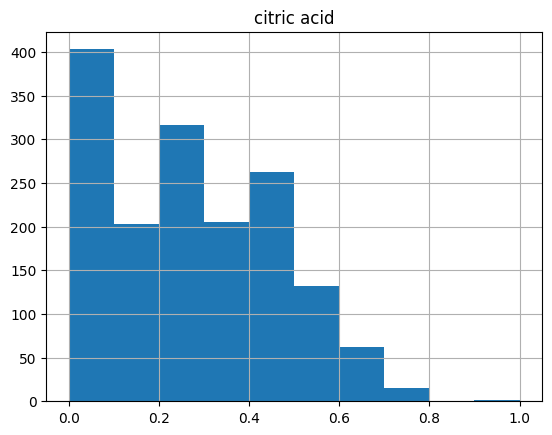

In [29]:
#Histogram
df[['citric acid']].hist()

#T-test

In [32]:
#load data
data = pd.read_csv("/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics/stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#subset
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_de = data.loc[data.Country == 'Germany'].Salary

In [34]:
#T-test
stat, p = st.ttest_ind(a = salary_uk, b= salary_de)
print(p)

if p > 0.05:
  print('Both countries have similar salaries (fail to reject H0)')
else:
  print('There is a difference in salaries (reject H0)')

0.026389999555203502
There is a difference in salaries (reject H0)


In [35]:
#T-test in experience between India and United States
us_experience = data.loc[data.Country == 'United States'].YearsCodedJob
in_experience = data.loc[data.Country == 'India'].YearsCodedJob
stat, p = st.ttest_ind(a = us_experience, b = in_experience)
print(p)
if p > 0.05:
  print('Groups are similar (fail to reject H0)')
else:
  print('Groups are different (reject H0)')

5.225676347614714e-58
Groups are different (reject H0)


<Axes: >

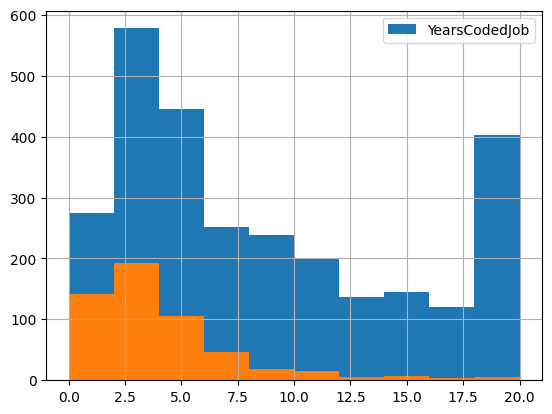

In [36]:
#Histograms
us_experience.hist(legend= True)
in_experience.hist()

#Chi-square test

In [37]:
#cross tabulation
tab = pd.crosstab(index = data.Country,
                  columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [38]:
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)
if p > 0.05:
  print("there is no relationship (fail to reject H0)")
else:
  print('There is a strong relationshiop (reject H0)')

3.321120877301216e-16
There is a strong relationshiop (reject H0)


In [39]:
#Chi square test between company size and hobbies
tab2 = pd.crosstab(index = data.Hobby,
                   columns = data.CompanySizeNumber)
chi2, p, dof, exp = st.chi2_contingency(tab2)
print(p)
if p > 0.05:
  print('There is no relationship (fail to reject H0)')
else:
  print('There is a strong relationship (reject H0)')

0.025708455559671013
There is a strong relationship (reject H0)
